In [ ]:
!pip install numpy tensorflow opencv-python matplotlib

In [ ]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import cv2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
import io
from google.colab import files

1. Import Data

In [ ]:
def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        img = Image.open(os.path.join(directory, filename))
        img = img.resize((224, 224))
        img = img.convert('RGB')
        img = np.array(img) / 255.0
        images.append(img)

    return images

In [ ]:
landscape_images = load_images('/content/drive/MyDrive/lanscap or potrait/Landscape')
potrait_images = load_images('/content/drive/MyDrive/lanscap or potrait/Portrait')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


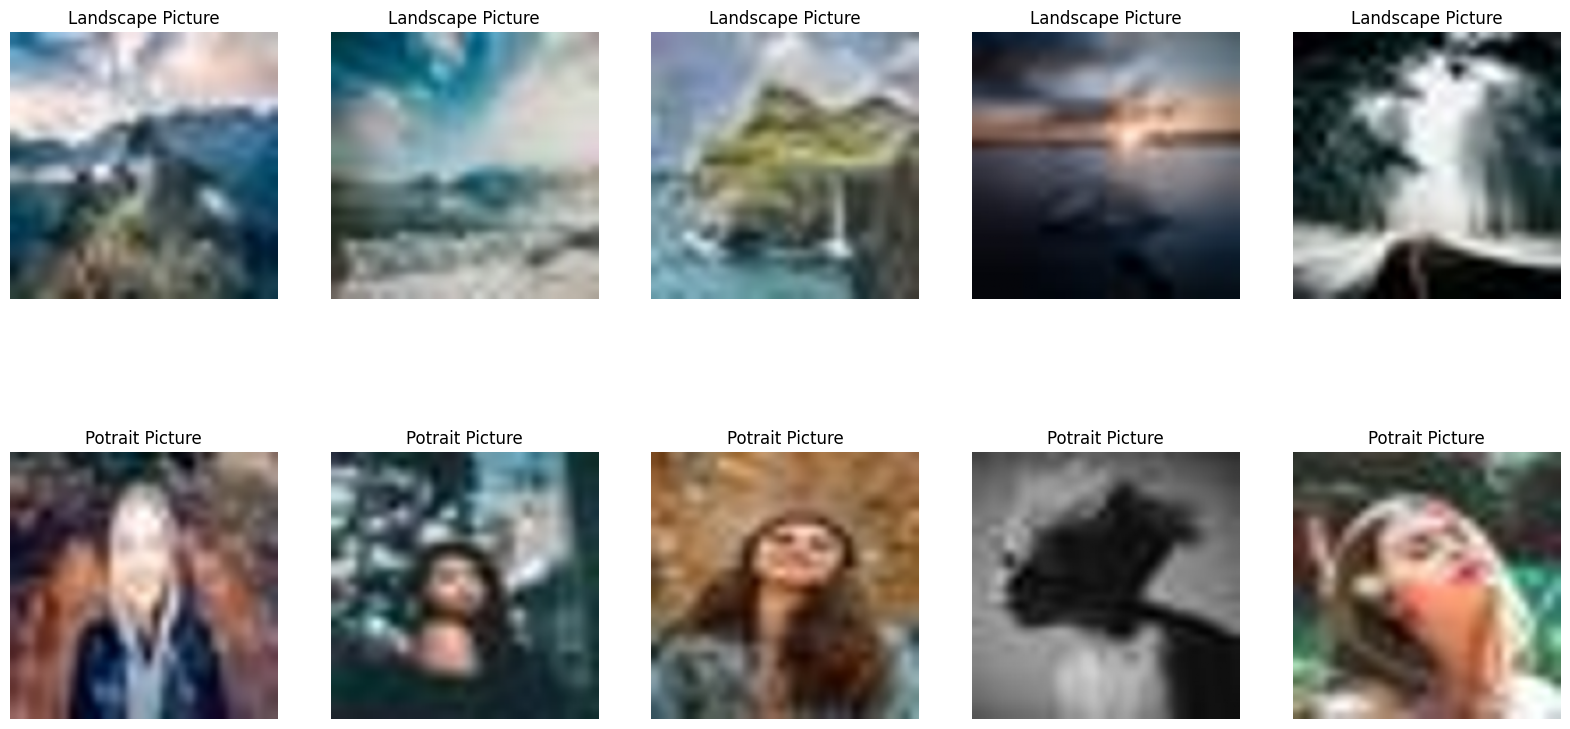

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# Menampilkan gambar dengan tumor
for i in range(5):
    axes[0, i].imshow(landscape_images[i])  # Menampilkan gambar Landscape
    axes[0, i].set_title('Landscape Picture')  # Menetapkan judul
    axes[0, i].axis('off')  # Mematikan axis

# Menampilkan gambar tanpa tumor
for i in range(5):
    axes[1, i].imshow(potrait_images[i])  # Menampilkan gambar Potrait
    axes[1, i].set_title('Potrait Picture')  # Menetapkan judul
    axes[1, i].axis('off')  # Mematikan axis

plt.show()  # Menampilkan hasil

In [ ]:
type(landscape_images)

list

In [ ]:
len(landscape_images)

150

In [ ]:
len(potrait_images)

150

2. Labeling

In [ ]:
def assign_labels(landscape_images, potrait_images):
    landscape_labels = np.ones(len(landscape_images))
    potrait_labels = np.zeros(len(potrait_images))
    return landscape_labels, potrait_labels

landscape_labels, potrait_labels = assign_labels(landscape_images, potrait_images)

In [ ]:
landscape_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
potrait_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
type(landscape_labels)

numpy.ndarray

In [ ]:
data = landscape_images + potrait_images
labels = np.concatenate((landscape_labels, potrait_labels) , axis=0)

In [ ]:
data

[array([[[0.15686275, 0.45098039, 0.60392157],
         [0.15294118, 0.45098039, 0.60392157],
         [0.15294118, 0.44705882, 0.6       ],
         ...,
         [0.72941176, 0.71372549, 0.71372549],
         [0.72941176, 0.71372549, 0.71372549],
         [0.72941176, 0.71372549, 0.71372549]],
 
        [[0.15686275, 0.45098039, 0.60392157],
         [0.15294118, 0.45098039, 0.60392157],
         [0.15294118, 0.44705882, 0.6       ],
         ...,
         [0.73333333, 0.71764706, 0.71372549],
         [0.73333333, 0.71764706, 0.71372549],
         [0.73333333, 0.71764706, 0.71372549]],
 
        [[0.15686275, 0.45098039, 0.60392157],
         [0.15294118, 0.45098039, 0.60392157],
         [0.15294118, 0.44705882, 0.6       ],
         ...,
         [0.73333333, 0.71764706, 0.71372549],
         [0.73333333, 0.71764706, 0.71372549],
         [0.73333333, 0.71764706, 0.71372549]],
 
        ...,
 
        [[0.17254902, 0.24705882, 0.22352941],
         [0.17254902, 0.24705882, 0.22352

In [ ]:
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
data[0].shape

(224, 224, 3)

3. Spliting Data

In [ ]:
X = np.array(data)
y = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

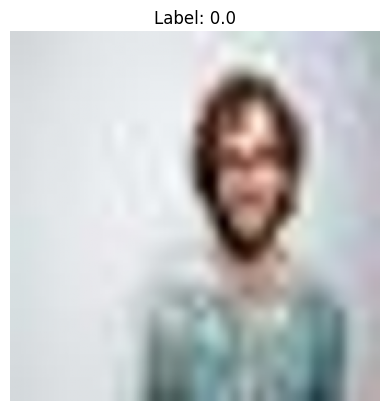

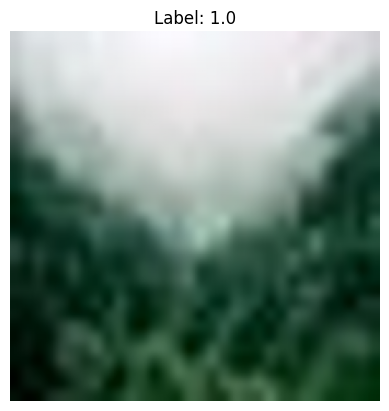

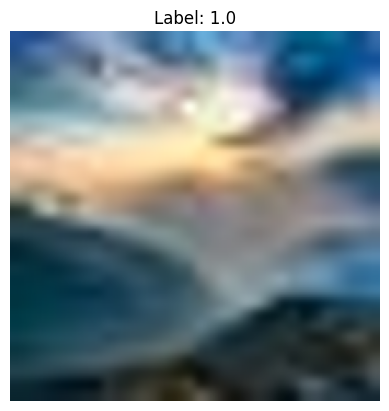

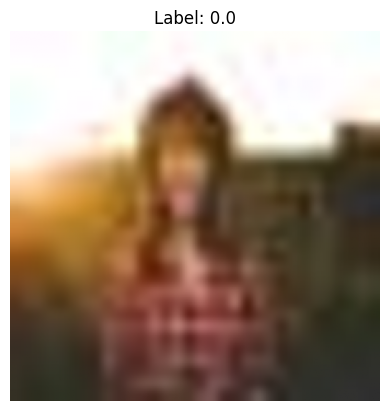

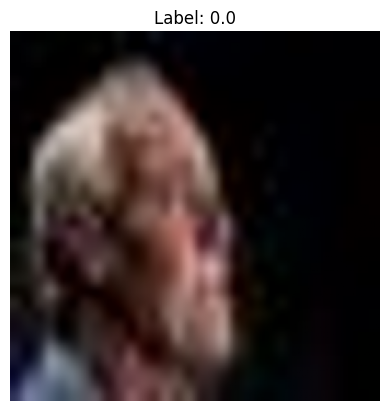

In [ ]:
for image, label in train.take(5):
    plt.figure()
    plt.imshow(image.numpy())
    plt.title('Label: {}'.format(label.numpy()))
    plt.axis('off')
    plt.show()

In [ ]:
validation_size = int(0.1 * 202)
train = train.skip(validation_size)
val = train.take(validation_size)

In [ ]:
BATCH_SIZE = 32
train = train.batch(BATCH_SIZE)
text = test.batch(BATCH_SIZE)
val = val.batch(BATCH_SIZE)

4. Training Data

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3), padding='valid'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 394272)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │     100,933,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,935,041 (385.04 MB)

 Trainable params: 100,935,041 (385.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam',
              loss= 'binary_crossentropy',
              metrics=["accuracy"])

In [ ]:
history = model.fit(train, validation_data = val, epochs = 20, verbose = 2)

Epoch 1/20
7/7 - 26s - 4s/step - accuracy: 0.5545 - loss: 18.4564 - val_accuracy: 0.7500 - val_loss: 3.7564
Epoch 2/20
7/7 - 22s - 3s/step - accuracy: 0.6273 - loss: 5.3439 - val_accuracy: 0.8000 - val_loss: 2.0512
Epoch 3/20
7/7 - 43s - 6s/step - accuracy: 0.6864 - loss: 2.2517 - val_accuracy: 0.7500 - val_loss: 1.6917
Epoch 4/20
7/7 - 38s - 5s/step - accuracy: 0.7773 - loss: 1.0064 - val_accuracy: 0.8500 - val_loss: 0.4642
Epoch 5/20
7/7 - 23s - 3s/step - accuracy: 0.8045 - loss: 0.5857 - val_accuracy: 0.8500 - val_loss: 0.3515
Epoch 6/20
7/7 - 21s - 3s/step - accuracy: 0.8682 - loss: 0.3580 - val_accuracy: 0.9000 - val_loss: 0.2296
Epoch 7/20
7/7 - 23s - 3s/step - accuracy: 0.8955 - loss: 0.2665 - val_accuracy: 0.9500 - val_loss: 0.1694
Epoch 8/20
7/7 - 41s - 6s/step - accuracy: 0.9091 - loss: 0.2301 - val_accuracy: 1.0000 - val_loss: 0.0960
Epoch 9/20
7/7 - 21s - 3s/step - accuracy: 0.9273 - loss: 0.2620 - val_accuracy: 1.0000 - val_loss: 0.0722
Epoch 10/20
7/7 - 23s - 3s/step - ac

In [ ]:
evaluation = model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 467ms/step - accuracy: 0.8681 - loss: 0.5563


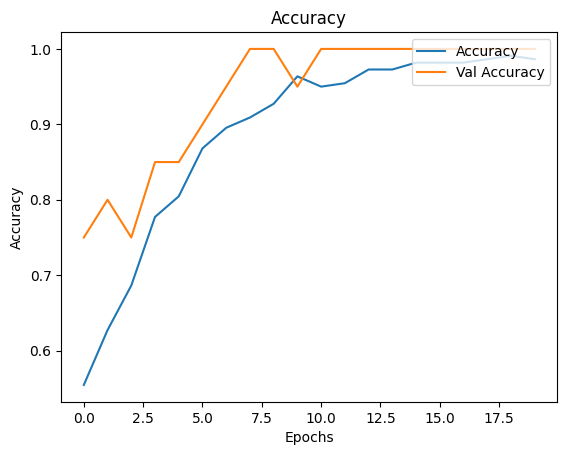

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Val Accuracy'], loc='upper right')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

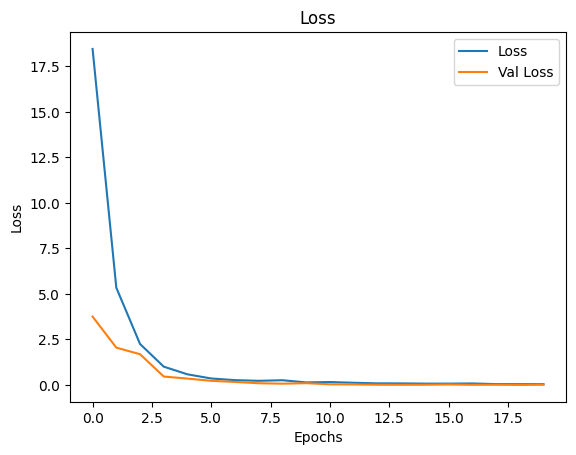

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Val Loss'], loc='upper right')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

5. Testing

In [ ]:
def load_uploaded_image(image_bytes):
    img = Image.open(io.BytesIO(image_bytes))
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = img_array / 255.0
    return img_array

def predict_image(image_bytes):
    img_array = load_uploaded_image(image_bytes)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)

    if prediction[0][0] > 0.5:
        return "Landscape Picture"
    else:
        return "Potrait Picture"

Saving Image32.jpg to Image32.jpg


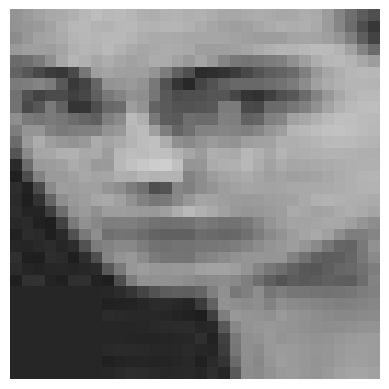

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Potrait Picture


In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]

img = Image.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

result = predict_image(image_bytes)
print(result)